In [1]:
from laptoppriceworkflow.data import get_json_data 
from laptoppriceworkflow.functions import clean_col_meta
from laptoppriceworkflow.functions import simplify_gwarancja
from laptoppriceworkflow.functions import simplify_komunikacja

import pandas as pd

import numpy as np

import seaborn as sns 

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline, make_pipeline, make_union

from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

In [3]:
df = get_json_data()

In [4]:
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

In [5]:
train.head(2)

,buynow_price,rodzaj karty graficznej,komunikacja,rozdzielczość (piksele),liczba rdzeni procesora,wielkość pamięci ram,system operacyjny,typ dysku twardego,sterowanie,multimedia,typ pamięci ram,taktowanie bazowe procesora (ghz),seria procesora,stan,pojemność dysku (gb),gwarancja,wielkość matrycy
70,1599.0,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr3,1.9,intel core i3,nowy,500.0,sprzedawcy,"13"" - 13.9"""
1489,2999.0,grafika dedykowana,"[nfc (near field communication), gps]",1920 x 1080,2,12 gb,[windows 10 home],None,[touchpad],"[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr4,2.0,intel core i3,nowy,480.0,producenta,"15"" - 15.9"""


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5928 entries, 70 to 5978
Data columns (total 17 columns):
buynow_price                         5928 non-null float64
rodzaj karty graficznej              5550 non-null object
komunikacja                          5342 non-null object
rozdzielczość (piksele)              5467 non-null object
liczba rdzeni procesora              5928 non-null object
wielkość pamięci ram                 5592 non-null object
system operacyjny                    5428 non-null object
typ dysku twardego                   5594 non-null object
sterowanie                           5422 non-null object
multimedia                           5403 non-null object
typ pamięci ram                      5275 non-null object
taktowanie bazowe procesora (ghz)    5219 non-null float64
seria procesora                      5531 non-null object
stan                                 5928 non-null object
pojemność dysku (gb)                 5561 non-null float64
gwarancja          

In [7]:
train.describe(include = 'all')

,buynow_price,rodzaj karty graficznej,komunikacja,rozdzielczość (piksele),liczba rdzeni procesora,wielkość pamięci ram,system operacyjny,typ dysku twardego,sterowanie,multimedia,typ pamięci ram,taktowanie bazowe procesora (ghz),seria procesora,stan,pojemność dysku (gb),gwarancja,wielkość matrycy
count,5928.000000,5550,5342,5467,5928,5592,5428,5594,5422,5403,5275,5219.000000,5531,5928,5561.000000,5928,5661
unique,NaN,2,100,12,7,11,23,5,12,15,3,NaN,18,1,NaN,3,6
top,NaN,grafika dedykowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,2,8 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr4,NaN,intel core i5,nowy,NaN,producenta,"15"" - 15.9"""
freq,NaN,3251,1422,3429,3582,2349,2875,2832,1745,4365,3433,NaN,1935,5928,NaN,5027,3986
mean,3481.128725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.338461,NaN,NaN,652.768747,NaN,NaN
std,1734.934432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.388287,NaN,NaN,478.749907,NaN,NaN
min,429.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000,NaN,NaN,0.000000,NaN,NaN
25%,2219.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.100000,NaN,NaN,256.000000,NaN,NaN
50%,3149.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,500.000000,NaN,NaN
75%,4399.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.600000,NaN,NaN,1000.000000,NaN,NaN


In [8]:
train.isnull().sum()/train.shape[0]

buynow_price                         0.000000
rodzaj karty graficznej              0.063765
komunikacja                          0.098853
rozdzielczość (piksele)              0.077767
liczba rdzeni procesora              0.000000
wielkość pamięci ram                 0.056680
system operacyjny                    0.084345
typ dysku twardego                   0.056343
sterowanie                           0.085358
multimedia                           0.088563
typ pamięci ram                      0.110155
taktowanie bazowe procesora (ghz)    0.119602
seria procesora                      0.066970
stan                                 0.000000
pojemność dysku (gb)                 0.061910
gwarancja                            0.000000
wielkość matrycy                     0.045040
dtype: float64

In [9]:
train.corr()

,buynow_price,taktowanie bazowe procesora (ghz),pojemność dysku (gb)
buynow_price,1.000000,0.596852,0.273810
taktowanie bazowe procesora (ghz),0.596852,1.000000,0.299299
pojemność dysku (gb),0.273810,0.299299,1.000000


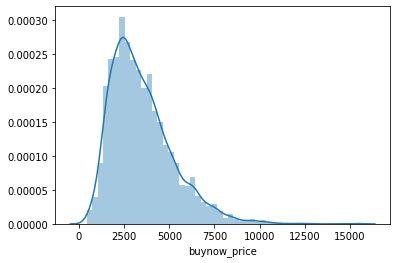

In [10]:
sns.distplot(train["buynow_price"])
plt.show()

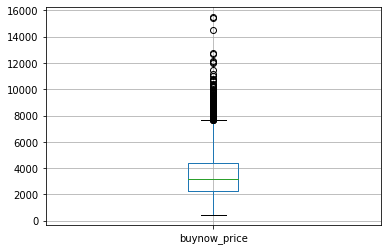

In [11]:
train.boxplot("buynow_price")

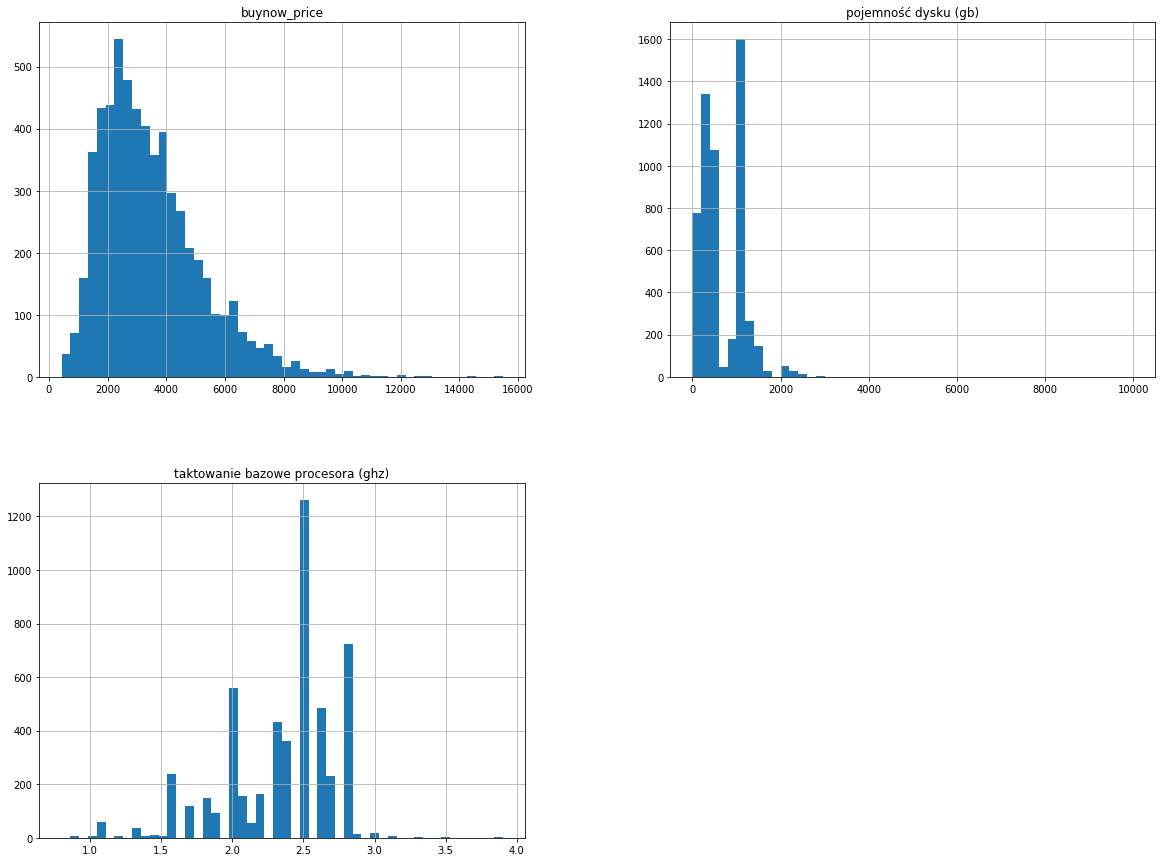

In [12]:
train.hist(bins=50, figsize=(20,15))
plt.show()

In [6]:
class FeatureEng(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        #imm = joblib.load(PATH_TO_IMM)
        #metadata_dense = reduce_mem_usage(pd.read_csv(METADATA_DENSE).fillna(0))
        #X["country"] = X["city"].map(lambda x: x.split(",")[-1].strip())
        X["rodzaj karty graficznej"].fillna("", inplace=True)
        X["komunikacja"].fillna("", inplace=True)
        X["rozdzielczość (piksele)"].fillna("", inplace=True)
        
        X['rozdzielczosc_piksele'] = X["rozdzielczość (piksele)"].map(lambda x: 1 if x == '1920 x 1080' else 0)
        X.drop('rozdzielczość (piksele)', axis = 1)
        
        #X['liczba_rdzeni_proc_trans'] = ['2' if x == '2' else '' for x in X.loc[:,"liczba rdzeni procesora"]]
        X['liczba_rdzeni_proc_trans'] = X['liczba rdzeni procesora'].map(lambda x: '2' if x == '2' else '')
        
        X.drop('liczba rdzeni procesora', axis = 1)
        
        X["wielkość pamięci ram"].fillna('0', inplace=True)
        
        #X["wielkosc_pamieci_ram_trans"] = [0 if "mb" in x else int(x.strip('gb')) for x in X.loc[:, "wielkość pamięci ram"]]
        X["wielkosc_pamieci_ram_trans"] = X["wielkość pamięci ram"].map(lambda x: 0 if "mb" in x else int(x.strip('gb')))
        
        X.drop("wielkość pamięci ram", axis = 1)
        
        X["system operacyjny"].fillna('', inplace=True)
        X["typ dysku twardego"].fillna('', inplace=True)
        X["lan"] = X['komunikacja'].map(lambda x: 1 if any("lan" in i for i in x) else 0)
        X["wi-fi"] = X['komunikacja'].map(lambda x: 1 if any("wi-fi" in i for i in x) else 0)
        X["nfc"] = X['komunikacja'].map(lambda x: 1 if any("nfc" in i for i in x) else 0)
        
        X.drop("komunikacja", axis = 1)
        
        X['windows'] = X['system operacyjny'].map(lambda x: 1 if any("windows" in i for i in x) else 0)
        X.drop("system operacyjny", axis = 1)
        
        return X

In [14]:
laps = train.copy()

### duże zagęszczenie punktów danych

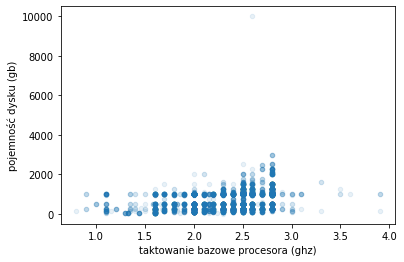

In [15]:
laps.plot(kind="scatter", x="taktowanie bazowe procesora (ghz)", y="pojemność dysku (gb)", alpha=0.1)



No handles with labels found to put in legend.


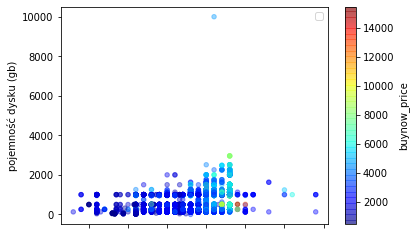

In [16]:
train.plot(kind="scatter", x="taktowanie bazowe procesora (ghz)", y="pojemność dysku (gb)", alpha=0.4,
    #s=train["buynow_price"]/100, label="Cena", figsize=(10,7),
    c="buynow_price", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [17]:
corr_matrix = train.corr()
corr_matrix['buynow_price'] 

buynow_price                         1.000000
taktowanie bazowe procesora (ghz)    0.596852
pojemność dysku (gb)                 0.273810
Name: buynow_price, dtype: float64

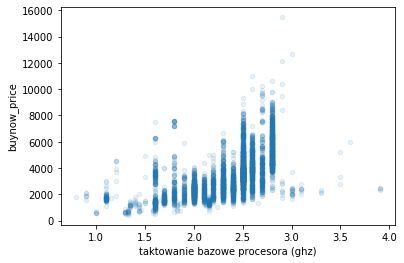

In [18]:
laps.plot(kind="scatter", x="taktowanie bazowe procesora (ghz)", y="buynow_price", alpha=0.1)

In [19]:
laps = train.drop("buynow_price", axis=1)
laps_labels = train["buynow_price"].copy()

In [20]:
vectorizer = FeatureEng()
ddd = vectorizer.fit_transform(test)
ddd
#ddd  = FeatureEng.fit_transform(train)

C:\Users\marcin\Miniconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\marcin\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\marcin\Miniconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

,buynow_price,rodzaj karty graficznej,komunikacja,rozdzielczość (piksele),liczba rdzeni procesora,wielkość pamięci ram,system operacyjny,typ dysku twardego,sterowanie,multimedia,typ pamięci ram,taktowanie bazowe procesora (ghz),seria procesora,stan,pojemność dysku (gb),gwarancja,wielkość matrycy,rozdzielczosc_piksele,liczba_rdzeni_proc_trans,wielkosc_pamieci_ram_trans,lan,wi-fi,nfc,windows
7831,1699.00,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,4 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr3l,1.6,intel pentium quad-core,nowy,120.0,producenta,"15"" - 15.9""",0,,4,1,1,0,1
1510,2677.00,grafika dedykowana,"[wi-fi 802.11 a/b/g/n/ac, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,2,12 gb,[brak systemu],ssd,"[klawiatura, touchpad, klawiatura podświetlana, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr4,2.4,intel core i3,nowy,240.0,producenta,"15"" - 15.9""",1,2,12,1,1,0,0
1817,4299.00,grafika dedykowana,,1920 x 1080,4,0,,ssd + hdd,None,None,None,NaN,intel core i5,nowy,NaN,producenta,"15"" - 15.9""",1,,0,0,0,0,0
5561,899.00,,,,2,0,,,None,None,None,NaN,None,nowy,NaN,producenta,None,0,2,0,0,0,0,0
7070,6399.00,grafika dedykowana,"[bluetooth, nfc (near field communication)]",1920 x 1080,4,8 gb,[windows 10 home],ssd,[touchpad],None,ddr4,2.8,intel core i7,nowy,512.0,producenta,"15"" - 15.9""",1,,8,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3405,2299.01,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,4 gb,[windows 10 professional],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr3l,2.1,None,nowy,480.0,producenta,"15"" - 15.9""",0,2,4,1,1,0,1
5611,6324.00,grafika dedykowana,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 mbps, intel wireless display (widi), nfc (near field communication), modem 3g (wwan)]",1920 x 1080,4,16 gb,[brak systemu],hdd,"[klawiatura, touchpad, klawiatura podświetlana]","[kamera, głośniki, mikrofon]",ddr4,2.5,intel core i5,nowy,1000.0,producenta,"15"" - 15.9""",1,,16,1,0,1,0
5720,3249.00,grafika zintegrowana,"[lan 10/100/1000 mbps, nfc (near field communication), modem 3g (wwan)]",1920 x 1080,2,8 gb,[windows 10 professional],ssd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr4,2.5,intel core i5,nowy,180.0,producenta,"14"" - 14.9""",1,2,8,1,0,1,1
7596,2039.00,grafika dedykowana,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,2,4 gb,[brak systemu],hdd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikrofon]",ddr3l,2.6,intel core i5,nowy,1000.0,producenta,"15"" - 15.9""",0,2,4,1,1,0,0


In [83]:
class PandasToNpArray(BaseEstimator, TransformerMixin):
    def fit(self, X, *arg):
        return self

    def transform(self, X):
        return X.values.astype(np.float)

In [50]:
full_pipeline = ColumnTransformer([

               (
                    "ram",
                    #make_pipeline(PandasToNpArray(), SimpleImputer(strategy="constant", fill_value=-9999)),
                    make_pipeline(SimpleImputer(strategy="constant", fill_value=-9999), StandardScaler()),
                    ['wielkosc_pamieci_ram_trans', 'rozdzielczosc_piksele'],
                ),
              (
                    "other_vars",
                    make_pipeline(StandardScaler()),
                    #make_pipeline(StandardScaler()),
                    ['lan','wi-fi', 'nfc', 'windows','rozdzielczosc_piksele'],
                ),
               (
                    "cat_vars",
                    make_pipeline(OneHotEncoder(sparse=False)),
                    #list(['gwarancja']),
                    ['rodzaj karty graficznej','gwarancja','rozdzielczosc_piksele','liczba_rdzeni_proc_trans'],
                )
])

In [54]:
full_pipeline.fit_transform(train)

array([[-0.17504823, -1.16590372,  0.58377737, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.42142358,  0.85770376, -1.71298178, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.01789539, -1.16590372,  0.58377737, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.77152004,  0.85770376,  0.58377737, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.01789539,  0.85770376,  0.58377737, ...,  1.        ,
         1.        ,  0.        ],
       [-0.17504823,  0.85770376,  0.58377737, ...,  1.        ,
         0.        ,  1.        ]])

In [8]:
preprocessor = make_pipeline(
        FeatureEng(),
            ColumnTransformer(
            [

               (
                    "ram",
                    #make_pipeline(PandasToNpArray(), SimpleImputer(strategy="constant", fill_value=-9999)),
                    make_pipeline(SimpleImputer(strategy="constant", fill_value=-9999), StandardScaler()),
                    ['wielkosc_pamieci_ram_trans', 'rozdzielczosc_piksele'],
                ),
              (
                    "other_vars",
                    make_pipeline(StandardScaler()),
                    #make_pipeline(StandardScaler()),
                    ['lan','wi-fi', 'nfc', 'windows','rozdzielczosc_piksele'],
                ),
               (
                    "cat_vars",
                    make_pipeline(OneHotEncoder(sparse=False)),
                    #list(['gwarancja']),
                    ['rodzaj karty graficznej','gwarancja','rozdzielczosc_piksele','liczba_rdzeni_proc_trans'],
                ),
                
                
                
            ]
        
        )
    
)

In [13]:
preprocessor.fit_transform(train)

C:\Users\marcin\Miniconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\marcin\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\marcin\Miniconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

array([[-0.17504823, -1.16590372,  0.58377737, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.42142358,  0.85770376, -1.71298178, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.01789539, -1.16590372,  0.58377737, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.77152004,  0.85770376,  0.58377737, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.01789539,  0.85770376,  0.58377737, ...,  1.        ,
         1.        ,  0.        ],
       [-0.17504823,  0.85770376,  0.58377737, ...,  1.        ,
         0.        ,  1.        ]])

In [24]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [15]:
ridge_model = Ridge(
    solver='auto', fit_intercept=True, alpha=1.0,
    max_iter=100, normalize=False, tol=0.05, random_state = 1,
)

In [16]:
linear_model = LinearRegression(
)

In [17]:
tree_reg = DecisionTreeRegressor()

In [18]:
forest_reg = RandomForestRegressor()

param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error')

train_labels = train['buynow_price'].copy()
test_labels = test['buynow_price'].copy()

pipeline = make_pipeline(
    preprocessor,
    grid_search
)

In [19]:
train_prepared = preprocessor.fit_transform(train)

C:\Users\marcin\Miniconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\marcin\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\marcin\Miniconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

In [20]:
grid_search.fit(train_prepared, train['buynow_price'])

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [22]:
#pipeline.fit(train, train['buynow_price'])
grid_search_random_forest_preds = grid_search.predict(train_prepared)

lin_mse = mean_squared_error(grid_search_random_forest_preds, train['buynow_price'])
lin_rmse = np.sqrt(lin_mse)
lin_rmse

976.2025377793285

In [27]:
scores = cross_val_score(grid_search.best_estimator_, train_prepared, train['buynow_price'],scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [28]:
def display_scores(scores):
    print("Wyniki:", scores)
    print("Średnia:", scores.mean())
    print("Odchylenie standardowe:", scores.std())

display_scores(tree_rmse_scores)

Wyniki: [1009.5390956  1065.81086013 1045.03827229  959.24065735 1103.60580322
 1084.92528193 1084.20973097 1141.60613981 1036.05254849 1026.66512799]
Średnia: 1055.6693517777742
Odchylenie standardowe: 49.215775177885796


In [29]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [30]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

1087.3031693030903 {'max_features': 2, 'n_estimators': 3}
1068.603677978695 {'max_features': 2, 'n_estimators': 10}
1064.0157782711021 {'max_features': 2, 'n_estimators': 30}
1089.4585047041026 {'max_features': 4, 'n_estimators': 3}
1067.0761996974902 {'max_features': 4, 'n_estimators': 10}
1064.5679755931303 {'max_features': 4, 'n_estimators': 30}
1085.4808600496287 {'max_features': 6, 'n_estimators': 3}
1063.8149355948688 {'max_features': 6, 'n_estimators': 10}
1064.362098357233 {'max_features': 6, 'n_estimators': 30}
1089.5475785398698 {'max_features': 8, 'n_estimators': 3}
1064.1447544993543 {'max_features': 8, 'n_estimators': 10}
1063.212853569759 {'max_features': 8, 'n_estimators': 30}
1069.7104465444122 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1064.4944202651618 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
1067.8627894782528 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1067.023823650638 {'bootstrap': False, 'max_features': 3, 'n_est

In [31]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.24388964, 0.01462709, 0.05244008, 0.0467929 , 0.01752806,
       0.02877889, 0.0215552 , 0.01359935, 0.06278834, 0.09017622,
       0.0004179 , 0.0345846 , 0.02473013, 0.03900786, 0.01439545,
       0.10660522, 0.18808307])

In [152]:
encoder = OneHotEncoder()
encoder.fit_transform(train[['rodzaj karty graficznej','gwarancja','rozdzielczosc_piksele','liczba_rdzeni_proc_trans']])

#train[['rodzaj karty graficznej','gwarancja','rozdzielczosc_piksele','liczba_rdzeni_proc_trans']]

<5928x10 sparse matrix of type '<class 'numpy.float64'>'
	with 23712 stored elements in Compressed Sparse Row format>

In [63]:
#extra_attribs = ["Pokoje_na_rodzinę", "Populacja_na_rodzinę", "Sypialnie_na_pokoje"]
cat_encoder = full_pipeline.named_transformers_["cat_vars"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
#cat_one_hot_attribs = list(encoder.categories_)
attributes = ['wielkosc_pamieci_ram_trans', 'rozdzielczosc_piksele','lan','wi-fi', 'nfc', 'windows','rozdzielczosc_piksele'] + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

AttributeError: 'Pipeline' object has no attribute 'categories_'

In [71]:
cat_encoder.

<bound method Pipeline._inverse_transform of Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='error', sparse=False))],
         verbose=False)>

In [33]:
final_model = grid_search.best_estimator_

In [37]:
#X_test = strat_test_set.drop("median_house_value", axis=1)
#y_test = strat_test_set["median_house_value"].copy()

test_prepared = preprocessor.transform(test)
final_predictions = final_model.predict(test_prepared)
final_mse = mean_squared_error(test['buynow_price'], final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

C:\Users\marcin\Miniconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\marcin\Miniconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\marcin\Miniconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

1163.7784124172435